<a href="https://colab.research.google.com/github/deysas212/TSF-Data-Science-Internship/blob/main/Task_2_Prediction_Using_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation:**

## **Data Science & Business Analytics Intern - May'21**



## **Author: Saswati** **Dey**

## **Task 2 : Prediction using Unsupervised ML**  

In this task2, we have to predict the optimum number of clusters and then it's visualization.Also, there will be some basics of K-Means Clustering used K-means is a simple unsupervised machine learning algorithm that groups data into a specified number(k) of clusters.

In [ ]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
%matplotlib inline

In [ ]:
#Importing the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [ ]:
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
# Summary of Data
iris_df.info()
iris_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## **VISUALIZATION OF FEATURES** 

<function matplotlib.pyplot.show>

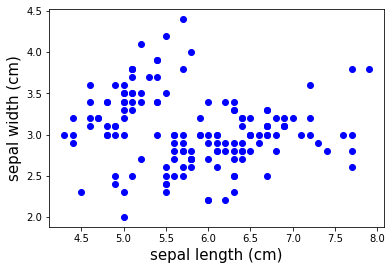

In [ ]:
# Visualizing relation between features "sepals"
plt.scatter(x= 'sepal length (cm)', y= 'sepal width (cm)',data= iris_df,color='b')
plt.xlabel('sepal length (cm)',fontsize=15)
plt.ylabel('sepal width (cm)',fontsize=15)
plt.show

<function matplotlib.pyplot.show>

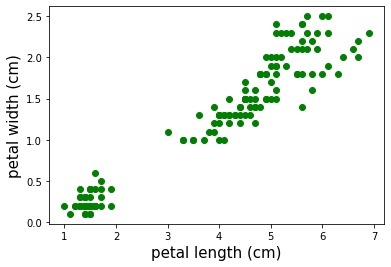

In [ ]:
# Visualizing relation between features "petals"
plt.scatter(x= 'petal length (cm)',y= 'petal width (cm)',data=iris_df,color='g')
plt.xlabel('petal length (cm)',fontsize=15)
plt.ylabel('petal width (cm)',fontsize=15)
plt.show

In [ ]:
# Correlation matrix between the features
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


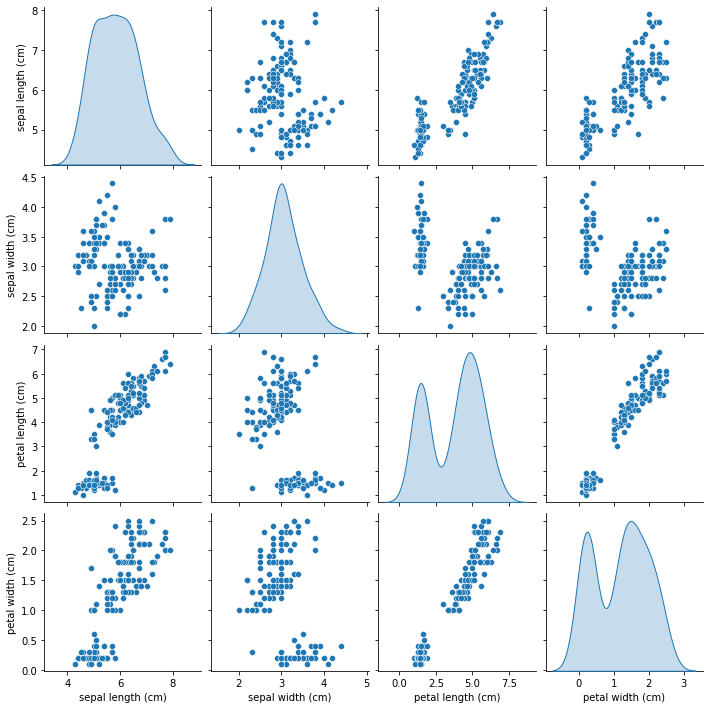

In [ ]:
sns.pairplot(data = iris_df, diag_kind = 'kde')

Although we have plotted the data, we cannot identify proper clusters ,so we'll now use the Unsupervised KMeans Clustering algorithm.KMeans will aggregate the data points together based on certain similarity.

 **FINDING OPTIMUM NUMBER OF CLUSTERS FOR K MEANS**

To determine the optimum number of clusters for K Means, we'll use "ELBOW METHOD". 

In cluster analysis,the elbow method is a heuristic used in determining the number of clusters in a data set.The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

In [ ]:
# Finding the optimum number of clusters in the data using "Elbow Method"

from sklearn.cluster import KMeans
wcss=[] # within cluster sum of squares

for i in range(1, 11):
  kmeans=KMeans(n_clusters = i,random_state=0)
  kmeans.fit(iris_df)
  wcss.append(kmeans.inertia_)

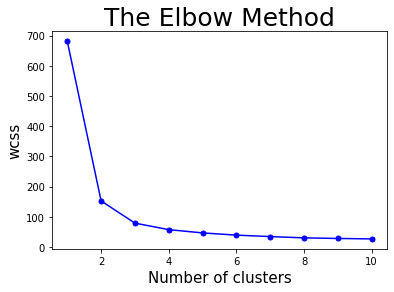

In [ ]:
# Plotting the results onto a line graph in order to observe the elbow.

clusters=range(1,11)
plt.plot(clusters,wcss, marker ='.', color="b", markersize=10)
plt.title('The Elbow Method',fontsize=25)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('wcss',fontsize=15)
plt.show()

We can clearly see why it's called 'The elbow method' from the above graph,the optimum clusters is where the elbow occurs.This is when the within cluster sum of squares doesn't decrease significantly with every iteration.

From this we choose the number of clusters as 3.

In [ ]:
# Applying kmeans to the dataset
kmeans=KMeans(n_clusters = 3, random_state = 0)
y_kmeans=kmeans.fit_predict(iris_df)

x = iris_df.iloc[:,[0, 1, 2, 3]].values

**VISUALIZATION OF CLUSTERS** 

**Based on Sepal Length and Sepal Width**

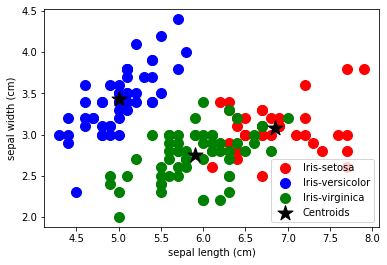

In [ ]:
# Visualizing the clusters (on the first two columns)
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],s = 100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1],s = 100, c='blue',label='Iris-versicolor')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],s= 100, c='green',label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s= 250, c='black',label='Centroids',marker='*')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.show()

**Based on Petal Length and Petal Width**

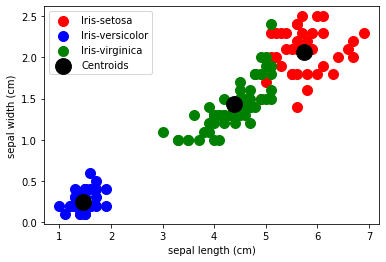

In [ ]:
# Visualizing the clusters (on the first two columns)
plt.scatter(x[y_kmeans == 0,2],x[y_kmeans == 0,3],s = 100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans == 1,2], x[y_kmeans == 1,3],s = 100, c='blue',label='Iris-versicolor')
plt.scatter(x[y_kmeans == 2,2],x[y_kmeans == 2,3],s= 100, c='green',label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3],
           s= 250, c='black',label='Centroids')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.show()

Visualizing the clusters, we can say that k=3 is appropriate solution for iris dataset.Also,in Sepal, when we plot Setosa and Virginica,the clusters are clumsy but in Petal clusters, they can be distinguished more easily. Hence, we can say that overall Petal based classification will be better.

**Thus, with this, our task2 of PREDICTION USING UNSUPERVISED ML is completed.**

**Thank you!**